# Probabilidad y Estadística para Inteligencia Artificial

- **Alumno:** Agustín Jesús Vazquez (e2301)

In [3]:
# Importamos librerías necesarias para el desarrollo

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio N°1

Siguiendo con la historia de Don Francisco, con el tiempo y gracias a los análisis de Matías, el pequeño comerciante de barrio cuenta hoy con 5 supermercados: 'Santa Ana', 'La Floresta', 'Los Cedros', 'Palermo' y 'Córdoba'. También Matías ha avanzado en la Especialización en Inteligencia Artificial. Un día Don Francisco le plantea algunas inquietudes adicionales:

1. Don Francisco quiere entender mejor las ventas por mes del supermercado 'Santa Ana'.
2. Más aún, Don Francisco no sabe si puede estar seguro de que las ventas son las mismas en todos los supermercados o si hay alguno que se comporte mejor que los demás, y si alguna de las tiendas necesite más atención porque sus ventas sean peores que los demás. Con base en lo anterior,
- **(3 puntos)** Determinen intervalos de confianza empíricos para el supermercado 'Santa Ana' en cada mes, para significancias del 95% y el 99%.
- **(4 puntos)** Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no, con significancia del 95.
- **(3 puntos)** Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen una prueba de hipótesis para determinar si la diferencia entre ellas es distinta de cero o no.

Deben realizar un informe en un documento pdf, en donde queden claros los siguientes aspectos:
 1. Planteamiento de los problemas de investigación
 2. Procesamiento realizado a los datos
 3. Resultados encontrados
 4. Análisis y conclusiones

### Resolución N°1

- Se cargan todas las hojas del archivo Excel.
- Se unifican en un único `DataFrame` y se agrega una columna `Supermercado` con el nombre de cada hoja.
- Se convierte la columna de fechas al tipo `datetime` y se extrae el mes correspondiente.

Este paso permite tener toda la información consolidada en una única estructura para análisis estadístico.

In [4]:
# Cargar datos
file_path = 'Enunciado y datos/Datos_TP_final_23Co2025_e2301.xlsx'
excel_file = pd.ExcelFile(file_path)

df = pd.read_excel(file_path)

# Vista general
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   365 non-null    datetime64[ns]
 1   Ventas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


(       Fecha        Ventas
 0 2023-01-01  13915.653632
 1 2023-01-02  16713.749511
 2 2023-01-03  17415.852595
 3 2023-01-04  19494.023926
 4 2023-01-05  22818.799458,
 None,
                      Fecha        Ventas
 count                  365    365.000000
 mean   2023-07-02 00:00:00  20990.659056
 min    2023-01-01 00:00:00  11333.434399
 25%    2023-04-02 00:00:00  18759.655091
 50%    2023-07-02 00:00:00  21248.570814
 75%    2023-10-01 00:00:00  23010.314328
 max    2023-12-31 00:00:00  28860.143317
 std                    NaN   3080.749475)

In [5]:
# 1. Obtener nombres de las hojas
hojas = excel_file.sheet_names
print("Hojas encontradas:", hojas)

Hojas encontradas: ['Santa Ana', 'La Floresta', 'Los Cedros', 'Palermo', 'Córdoba']


In [6]:
# 2. Leer cada hoja, agregar columna 'Supermercado' con el nombre de la hoja
dfs = []
for hoja in hojas:
    temp_df = pd.read_excel(file_path, sheet_name=hoja)
    temp_df['Supermercado'] = hoja        # <--- aquí agregamos el nombre de la hoja
    dfs.append(temp_df)

# 3. Unir todas las hojas en un solo DataFrame
df = pd.concat(dfs, ignore_index=True)

# 4. Asegurar formato correcto de fecha y extraer mes
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
df['Mes'] = df['Fecha'].dt.month

df.head()

,Fecha,Ventas,Supermercado,Mes
0,2023-01-01,13915.653632,Santa Ana,1
1,2023-01-02,16713.749511,Santa Ana,1
2,2023-01-03,17415.852595,Santa Ana,1
3,2023-01-04,19494.023926,Santa Ana,1
4,2023-01-05,22818.799458,Santa Ana,1


#### Intervalos de confianza

- Se filtran los registros correspondientes al supermercado **Santa Ana**.
- Se agrupan las ventas por mes.
- Se calculan intervalos de confianza para la media de ventas mensual, tanto al **95 %** como al **99 %**.
- Se utiliza la distribución *t* de Student debido a que trabajamos con muestras y no con parámetros poblacionales conocidos.

In [7]:
# Filtrar Santa Ana
santa_ana = df[df['Supermercado'] == 'Santa Ana']

# Agrupar por mes y calcular IC 95% y 99%
conf_intervals = []
for mes, grupo in santa_ana.groupby('Mes'):
    n = len(grupo['Ventas'])
    mean = np.mean(grupo['Ventas'])
    std = np.std(grupo['Ventas'], ddof=1)
    se = std / np.sqrt(n)
    ci95 = stats.t.interval(0.95, n-1, loc=mean, scale=se)
    ci99 = stats.t.interval(0.99, n-1, loc=mean, scale=se)
    conf_intervals.append([mes, mean, ci95, ci99])

conf_df = pd.DataFrame(conf_intervals, columns=['Mes', 'Media', 'IC 95%', 'IC 99%'])
conf_df


,Mes,Media,IC 95%,IC 99%
0,1,17080.033021,"(16092.60249316092, 18067.463548793676)","(15750.421170552427, 18409.644871402168)"
1,2,19161.388437,"(17854.31583549823, 20468.46103940395)","(17396.38701415431, 20926.38986074787)"
2,3,21986.340046,"(21020.97544084233, 22951.704652143122)","(20686.440779156936, 23286.239313828515)"
3,4,20059.823371,"(19109.945755538283, 21009.70098720921)","(18779.659414933798, 21339.987327813695)"
4,5,21220.437809,"(20345.360834872827, 22095.514782736933)","(20042.11418825913, 22398.76142935063)"
5,6,22295.229575,"(21329.911546753392, 23260.547603164552)","(20994.256348925483, 23596.20280099246)"
6,7,20858.711829,"(19895.991676986858, 21821.43198182281)","(19562.3734164853, 22155.050242324367)"
7,8,21951.956076,"(20921.390167555506, 22982.52198487771)","(20564.26083467908, 23339.651317754135)"
8,9,22908.471373,"(21889.83992134723, 23927.10282381541)","(21535.64686653266, 24281.29587862998)"
9,10,22174.217918,"(21211.75345582581, 23136.682379763395)","(20878.22380155387, 23470.212034035332)"


**Intervalo de confianza 95%**

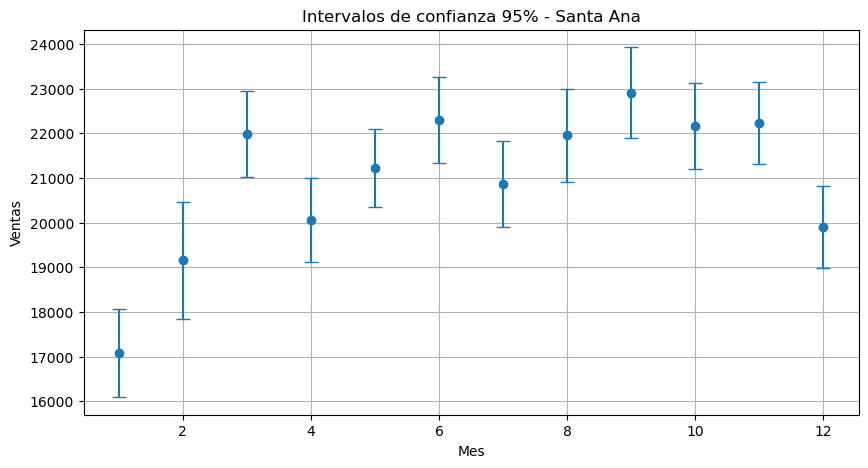

In [8]:
plt.figure(figsize=(10,5))
plt.errorbar(conf_df['Mes'], conf_df['Media'],
             yerr=[conf_df['Media'] - conf_df['IC 95%'].apply(lambda x: x[0]),
                   conf_df['IC 95%'].apply(lambda x: x[1]) - conf_df['Media']],
             fmt='o', capsize=5)
plt.title('Intervalos de confianza 95% - Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid()
plt.show()

**Intervalo de confianza 99%**

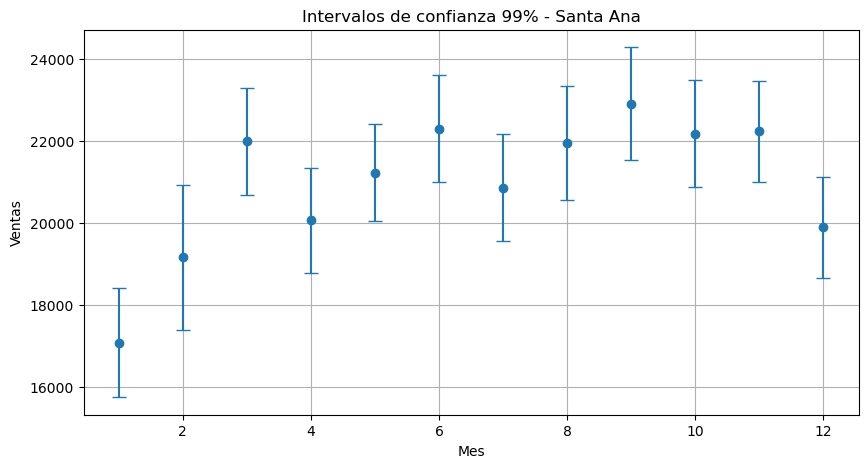

In [9]:
plt.figure(figsize=(10,5))
plt.errorbar(conf_df['Mes'], conf_df['Media'],
             yerr=[conf_df['Media'] - conf_df['IC 99%'].apply(lambda x: x[0]),
                   conf_df['IC 99%'].apply(lambda x: x[1]) - conf_df['Media']],
             fmt='o', capsize=5)
plt.title('Intervalos de confianza 99% - Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid()
plt.show()

Santa Ana presenta un patrón de ventas estacional claro, con un pico entre mayo y septiembre y caídas en los extremos del año. Además, la incertidumbre es mayor en los meses de baja venta, lo que indica que la demanda es menos estable en esos períodos.

Esto tiene implicancias para decisiones operativas:

- Refuerzo de stock y personal en temporada alta.

- Estrategias comerciales y promociones en temporada baja para estabilizar ventas.

#### Pruebas ANOVA

- Se aplica una **ANOVA de una vía** para comparar las medias de ventas entre todos los supermercados.
- Hipótesis:
  - H₀: Las medias de ventas son iguales.
  - H₁: Al menos una media difiere.
- Nivel de significancia: α = 0.05.

Si el *p-value* < 0.05, se rechaza H₀ → **hay diferencias significativas** entre supermercados. Si no, no se rechaza H₀.

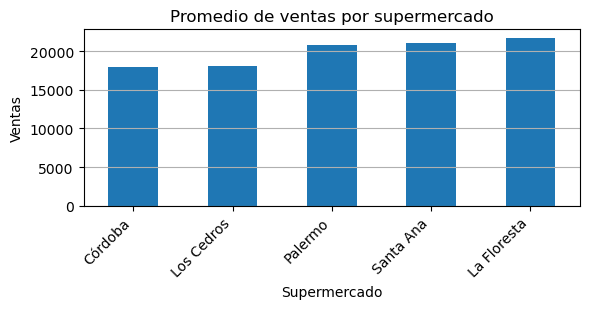

In [18]:
# Calcular promedio por supermercado
means_by_store = df.groupby("Supermercado")["Ventas"].mean().sort_values()

plt.figure(figsize=(6, 3.2))
means_by_store.plot(kind="bar")

plt.title("Promedio de ventas por supermercado")
plt.ylabel("Ventas")
plt.xlabel("Supermercado")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")

plt.tight_layout()

plt.show()

In [19]:
# Agrupar ventas por supermercado
grupos = [ventas['Ventas'].values for _, ventas in df.groupby('Supermercado')]

f_stat, p_value = stats.f_oneway(*grupos)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("❌ Se rechaza H₀: Hay diferencias significativas entre supermercados.")
else:
    print("✅ No se rechaza H₀: No hay diferencias significativas entre supermercados.")

F-statistic: 126.0367, p-value: 0.0000
❌ Se rechaza H₀: Hay diferencias significativas entre supermercados.


En nuestro análisis, el *p-value* fue extremadamente pequeño, por lo que **se rechaza H₀**. Esto significa que **no todas las tiendas tienen el mismo promedio de ventas**.

#### Promedio de ventas de tiendas

- Se calcula el promedio de ventas de cada tienda.
- Se identifican las tiendas con mayor y menor promedio.
- Se realiza una **prueba t de Welch**, que no asume igualdad de varianzas.

In [20]:
mean_by_store = df.groupby('Supermercado')['Ventas'].mean().sort_values()
store_min = mean_by_store.index[0]
store_max = mean_by_store.index[-1]

ventas_min = df[df['Supermercado'] == store_min]['Ventas']
ventas_max = df[df['Supermercado'] == store_max]['Ventas']

t_stat, p_val = stats.ttest_ind(ventas_max, ventas_min, equal_var=False)
print(f"Tienda con menor promedio: {store_min}")
print(f"Tienda con mayor promedio: {store_max}")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("❌ Se rechaza H₀: La diferencia de medias es significativa.")
else:
    print("✅ No se rechaza H₀: No hay diferencia significativa.")

Tienda con menor promedio: Córdoba
Tienda con mayor promedio: La Floresta
T-statistic: 17.0210, p-value: 0.0000
❌ Se rechaza H₀: La diferencia de medias es significativa.


#### Conclusiones
- Se observaron intervalos de confianza variables a lo largo del año para Santa Ana, lo cual puede indicar patrones estacionales.
- La prueba ANOVA mostró diferencias estadísticamente significativas entre los supermercados.
- La prueba t entre la tienda con mayor y menor promedio confirmó la existencia de diferencias significativas en las ventas.
- Estos resultados podrían utilizarse para **focalizar estrategias comerciales** o **ajustar recursos** en las tiendas con menor rendimiento.